# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [3]:
from scipy.stats import uniform
x = uniform.rvs(size = 10)
a = 2
b = 3
randoms  = a + (b-a) * x
print(randoms)

[2.21495478 2.65372559 2.61721476 2.40565562 2.17653444 2.86106377
 2.19474909 2.43181397 2.57267949 2.31749753]


In [ ]:
# This link (in the ReadMe) is no longer available:
# http://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/

**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

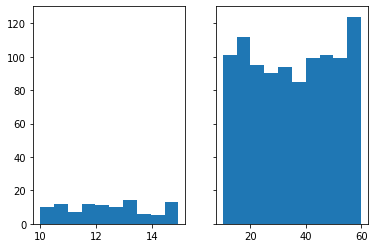

In [5]:
# your code here
# Again, everywhere I look I see diferent ways of doing this, all with different results
# (barely noticeable — and I don't mean because the random numbers are different) and I am 
# lost. I'm using what seems to make less nonsense to me.
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize =(6, 4), sharey = True)

def random_nbs(bottom, ceiling, count):
    x = uniform.rvs(size = count)
    return bottom + (ceiling - bottom) * x

dist_1 = random_nbs(10, 15, 100)
dist_2 = random_nbs(10, 60, 1000)

axs[0].hist(dist_1)
axs[1].hist(dist_2)
plt.show()

How are the two distributions different?

In [6]:
# your answer here:
# copied from João: 
"""
First one is generating random numbers between 10 and 15, second one is generating between 
10 and 60. 
The difference in scale of occurences is because of the sample size we took is very 
different - 100 and 1000.
"""

# or as Ricardo put it:
"""
the distributions are both uniform but they differ in their range of values
"""

'\nthe distributions are both uniform but they differ in their range of values\n'

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

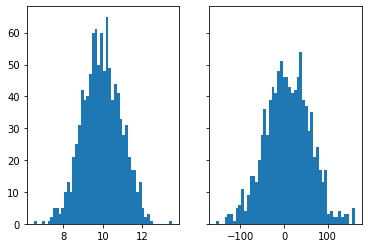

In [7]:
# your code here
#copied from João
from scipy.stats import norm

fig, axs = plt.subplots(1, 2,figsize =(6, 4), sharey = True)

def normal_nbs(st_dev, avg, count):
    return norm.rvs(st_dev, avg, count)

dist_1 = normal_nbs(10, 1, 1000)
dist_2 = normal_nbs(10, 50, 1000)

axs[0].hist(dist_1, bins = 50)
axs[1].hist(dist_2, bins = 50)
plt.show()

How are the two distributions different?

In [8]:
# your answer here:
# from João:
"""
The standard deviation is different, so the second distribution is more "spread out", since 
stdev is 50x more than the first one - horizontal scale is much bigger."""

'\nThe standard deviation is different, so the second distribution is more "spread out", since \nstdev is 50x more than the first one - horizontal scale is much bigger.'

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

pandas version: 0.25.1
Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')


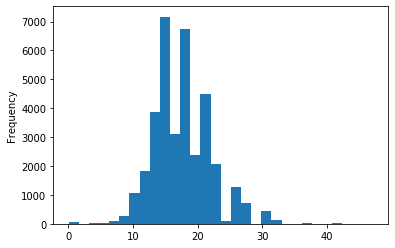

In [37]:
# your code here
# libraries
import os
import pandas as pd

# announcing the pd version
print("pandas version:", pd.__version__)

# checking the files in the directory
os.listdir()

# importing the vehicles.csv
vehicles = pd.read_csv("vehicles.csv")

# checking the columns in the DF
print(vehicles.columns)

# plotting the histogram of Fuel Barrels/Year
vehicles["Fuel Barrels/Year"].plot.hist(bins = 30)

2. CO2 Emission Grams/Mile 

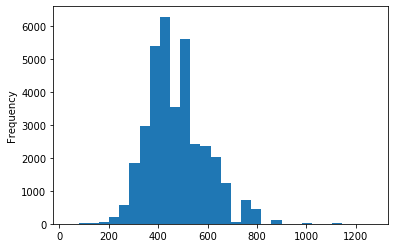

In [33]:
# your code here
# plotting the histogram of CO2 Emission Grams/Mile
vehicles["CO2 Emission Grams/Mile"].plot.hist(bins = 30)

3. Combined MPG

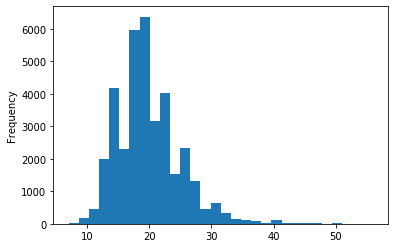

In [36]:
# your code here
vehicles["Combined MPG"].plot.hist(bins = 30)

Which one(s) of the variables are nearly normally distributed? How do you know?

In [ ]:
# you answer here:
"""
None. Depending on the number of bins we use we can 'make it look' like they do (or make it 
look like they don't), but even at this level we can notice that they're skewed and irregular.
To be absolutly sure, we'd use a normalcy test. Either way, it's not a good idea to judge a 
distribuiton by it's shape; the resolution we're using (in this case the number of bins) can 
be decieving.
"""

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with a mean of 1 and 100 and a size of 1000.

1. Plot the distributions as histograms with the number of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

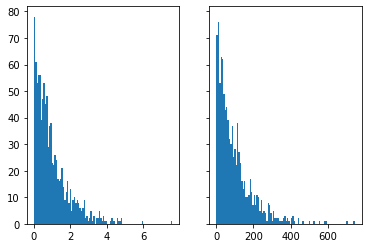

In [42]:
# your code here
# library
import numpy as np

# plot
fig, axs = plt.subplots(1 ,2, sharey = True)

def exp(mean, count):
    return np.random.exponential(mean, count)

dist1 = exp(1, 1000)
dist2 = exp(100, 1000)

figure = axs[0].hist(dist1, bins = 100)
figure = axs[1].hist(dist2, bins = 100)
plt.show()

How are the two distributions different?

In [ ]:
# your answer here:
"""
I'm lost again.
"""

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [44]:
# your answer here
# Hint: This is same as saying P(x<15)

# library
from scipy.stats import expon

expon.cdf(15, scale = 10)

0.7768698398515702

What is the probability that the customer will spend more than 15 minutes

In [45]:
# your answer here
1 - expon.cdf(15, scale = 10)

0.2231301601484298